<a href="https://colab.research.google.com/github/ratnesh003/Learning-NLP/blob/main/Assignment%204/NLP_Assingment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
!pip install nltk
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [128]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('treebank')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [129]:
tags_array = [
    'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNS',
    'NNP', 'NNPS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM',
    'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB'
]

In [130]:
from nltk.corpus import treebank
from nltk import word_tokenize, pos_tag

sentence = """
In recent years, advances in artificial intelligence and machine learning have revolutionized fields ranging from healthcare to finance, providing unprecedented capabilities for data analysis, pattern recognition, and decision-making automation.
Organizations worldwide are now leveraging these technologies to optimize their operations, enhance customer experiences, and gain competitive advantages, although the deployment of AI-powered systems is not without its challenges.
For instance, the rise of autonomous vehicles promises to reduce traffic congestion and accidents, yet it also raises concerns about job displacement for drivers and the ethical implications of machine-led decision-making in critical situations.
Additionally, machine learning algorithms are now integral in cybersecurity, identifying and mitigating threats that would be impossible for human analysts to detect in real-time, thus protecting sensitive data and infrastructure from malicious actors.
Meanwhile, in the medical field, AI-driven diagnostics are accelerating the detection of diseases such as cancer, often identifying subtle patterns that even experienced doctors might overlook, which has the potential to save countless lives.
As impressive as these achievements are, they bring forward ethical debates on topics such as privacy, data security, and the risk of algorithmic bias, especially when it comes to facial recognition and predictive policing technologies that may inadvertently discriminate against certain groups.
While researchers and policymakers work to establish frameworks that govern the responsible use of AI, there is a growing recognition of the need for transparency and accountability in these systems, which often operate as 'black boxes' whose decision-making processes are not easily understood by end-users.
Furthermore, natural language processing, a subfield of AI, has made remarkable strides in recent years, enabling more sophisticated applications such as real-time language translation, automatic summarization of lengthy documents, and sentiment analysis of social media posts.
However, the development of such systems is challenging due to the vast complexity of human language, which includes slang, idioms, context-dependent meanings, and cultural nuances that can vary significantly across different languages and regions.
Despite these challenges, the continued progress in AI and machine learning offers tremendous potential benefits, although it is clear that careful oversight will be necessary to ensure that these technologies are used ethically and do not inadvertently cause harm to individuals or society at large.
"""

tokens = word_tokenize(sentence)
print("Tokens:", tokens)

tagged_tokens = pos_tag(tokens)
print("POS Tagged Tokens:", tagged_tokens)

Tokens: ['In', 'recent', 'years', ',', 'advances', 'in', 'artificial', 'intelligence', 'and', 'machine', 'learning', 'have', 'revolutionized', 'fields', 'ranging', 'from', 'healthcare', 'to', 'finance', ',', 'providing', 'unprecedented', 'capabilities', 'for', 'data', 'analysis', ',', 'pattern', 'recognition', ',', 'and', 'decision-making', 'automation', '.', 'Organizations', 'worldwide', 'are', 'now', 'leveraging', 'these', 'technologies', 'to', 'optimize', 'their', 'operations', ',', 'enhance', 'customer', 'experiences', ',', 'and', 'gain', 'competitive', 'advantages', ',', 'although', 'the', 'deployment', 'of', 'AI-powered', 'systems', 'is', 'not', 'without', 'its', 'challenges', '.', 'For', 'instance', ',', 'the', 'rise', 'of', 'autonomous', 'vehicles', 'promises', 'to', 'reduce', 'traffic', 'congestion', 'and', 'accidents', ',', 'yet', 'it', 'also', 'raises', 'concerns', 'about', 'job', 'displacement', 'for', 'drivers', 'and', 'the', 'ethical', 'implications', 'of', 'machine-led',

In [131]:
def get_postagmap(tagged_tokens, tags_array):
    input_data = []
    postag_map = []
    words = []

    for token in tagged_tokens:
        input_data.append((token[0].lower(), token[1]))
        if token[0].lower() not in words:
            words.append(token[0].lower())

    for word in words:
        row = {}
        for tag in tags_array:
            row[tag] = input_data.count((word, tag))
        postag_map.append(row)


    return postag_map, words

word_map, unique_words = get_postagmap(tagged_tokens, tags_array)
df = pd.DataFrame(word_map, index=unique_words)
df.head(10)

,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,LS,...,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB
in,0,0,0,0,0,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
recent,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
years,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
",",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
advances,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
artificial,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
intelligence,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
and,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
machine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
learning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


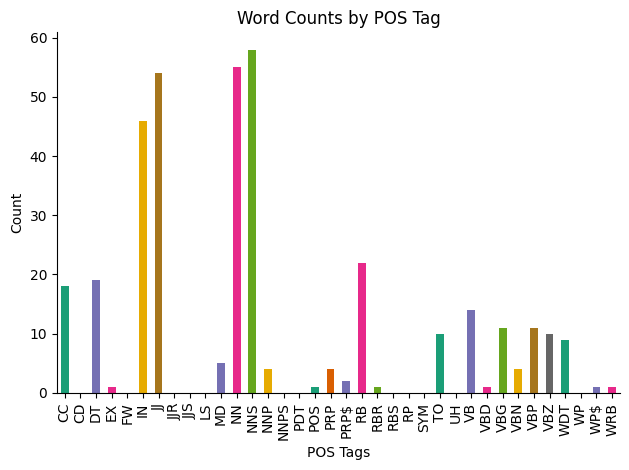

In [132]:
word_counts = df.apply(lambda row: sum(value for value in row), axis=0)

word_counts.plot(kind='bar', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('POS Tags')
plt.ylabel('Count')
plt.title('Word Counts by POS Tag')
plt.tight_layout()
plt.show()

In [133]:
from nltk.corpus import wordnet as wn

word = "Artificial"

synsets = wn.synsets(word)
print(f"Synsets for '{word}':", synsets)

definitions = [syn.definition() for syn in synsets]
print(f"Definitions for '{word}':", definitions)

examples = [syn.examples() for syn in synsets]
print(f"Examples for '{word}':", examples)

lemmas = synsets[0].lemmas()
print(f"Lemmas for the first synset of '{word}':", lemmas)

antonyms = [lemma.antonyms() for lemma in lemmas if lemma.antonyms()]
print(f"Antonyms for '{word}':", antonyms)

first_synset = synsets[0]
hyponyms = first_synset.hyponyms()
hypernyms = first_synset.hypernyms()
print(f"Hyponyms for '{word}':", hyponyms)
print(f"Hypernyms for '{word}':", hypernyms)

Synsets for 'Artificial': [Synset('artificial.a.01'), Synset('artificial.s.02'), Synset('artificial.s.03')]
Definitions for 'Artificial': ['contrived by art rather than nature', 'artificially formal', 'not arising from natural growth or characterized by vital processes']
Examples for 'Artificial': [['artificial flowers', 'artificial flavoring', 'an artificial diamond', 'artificial fibers', 'artificial sweeteners'], ['that artificial humility that her husband hated', 'contrived coyness', 'a stilted letter of acknowledgment', 'when people try to correct their speech they develop a stilted pronunciation'], []]
Lemmas for the first synset of 'Artificial': [Lemma('artificial.a.01.artificial'), Lemma('artificial.a.01.unreal')]
Antonyms for 'Artificial': [[Lemma('natural.a.02.natural')]]
Hyponyms for 'Artificial': []
Hypernyms for 'Artificial': []


In [134]:
sentence = input("Enter a sentence: ")

tokens = word_tokenize(sentence)
tagged_tokens = pos_tag(tokens)
print("Tokens and POS Tags:", tagged_tokens)

Enter a sentence: My name is ratnesh tarakant pasi, what is your name ?
Tokens and POS Tags: [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('ratnesh', 'JJ'), ('tarakant', 'JJ'), ('pasi', 'NN'), (',', ','), ('what', 'WP'), ('is', 'VBZ'), ('your', 'PRP$'), ('name', 'NN'), ('?', '.')]
